*This cell declares LaTeX macros.*
$\DeclareMathOperator*{argmax}{arg\,max}$
$\DeclareMathOperator{SE}{SE}$

In [5]:
%%javascript
// Add LaTeX equation numbering.
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# I. Course Questions

## A. Maximum Likelihood Estimation

**Alice throws a coin 100 times and obtains 55 times a tail. Estimate by maximum likelihood the probability that the coin gives a tails. What confidence do we have in this result? Should Alice consider the coin to be unfair?**

We're modelling the outcome of a coin flip by a Bernoulli distribution 

\begin{equation}
    p_{\text{model}}(x; \theta) = \theta^x (1 - \theta)^{1 - x},
\end{equation} 

where the parameter $\theta$ represents the probability of getting a tails. Thus, the maximum likelihood estimator for $\theta$ is

\begin{equation}
    \begin{split}
        \theta_{\text{ML}} &= \argmax_\theta \mathbb{E}_{x \sim \widehat{p}_{\text{data}}} [\log p_{\text{model}}(x; \theta)]\\
        &= \argmax_\theta \left(\widehat{\theta} \log\theta + (1 - \widehat{\theta}) \log(1 - \theta)\right)\\
        &= \widehat{\theta},
    \end{split}
\end{equation}

where $\widehat{\theta}$ is the sample estimate of the probability that the coin gives a tails and $\widehat{p}_{\text{data}}$ is the empirical distribution defined by the observed sample.

Given that after 100 throws, Alice obtained 55 tails, then

\begin{equation}
    \theta_{\text{ML}} = \widehat{\theta} = 0.55.
\end{equation}

Knowing that 

\begin{equation}
    \begin{split}
        \SE(\theta_{\text{ML}}) &= \sqrt{\frac{\widehat{\theta} (1 - \widehat{\theta})}{n}}\\
        &\approx 0.05
    \end{split}
\end{equation}

and considering the normal assumption ($100 \times 0.55 > 30$), the 95% confidence interval is given by

\begin{equation}
    \theta_{\text{ML}} \in \theta_{\text{ML}} \pm 1.96\times \SE(\theta_{\text{ML}}) \approx [0.45, 0.65].
\end{equation}

Therefore, as the 95% confidence interval contains 0.5, Alice cannot reject the null hypothesis that her coin is fair (at the 5% confidence level).

## B. Bayesian Estimation

**Bob is tested for a disease. The test, which is either positive or negative, is only 90% reliable. Given that 1% of people of Bob’s age and background have the disease, what is the probability that Bob has the disease?**

Since we know nothing about the test results, we will assume that the test came back positive (without this assumption, the only valid conclusion would be that Bob has a 1% probability of having the disease).

Considering the events 

- **ill**: "Bob has the disease",
- **+**: "Bob has tested positive",

and given that 
\begin{equation}
    \begin{cases}
        P(+ | \text{ill}) = 0.90,\\
        P(\text{ill}) = 0.01,
    \end{cases}
\end{equation}

then using Bayes' theorem,

\begin{equation}
    \begin{split}
        P(\text{ill} | +) &= \frac{P(\text{ill}, +)}{P(+)}\\
        &= \frac{P(+ | \text{ill}) P(\text{ill})}{P(+ | \text{ill})P(\text{ill}) + P(+ | \overline{\text{ill}})P(\overline{\text{ill}})}\\
        &= \frac{0.90 \times 0.01}{0.90 \times 0.01 + 0.10 \times 0.99}\\
        &\approx 0.08.
    \end{split}
\end{equation}

Thus, given that Bob has tested positive, he has a probability of about 8% to have the disease. This low probability reflects the lack of information we have (in fact, in a medical environment, the test result would be called *reactive* instead of *positive* and further testing would be done). Obvisouly, other factors (contact with contagious people, etc.), if taken into account in a refined model, could help Bob know if the result was a false or a true positive.

For example, a second positive test, given that the prior $P(\text{ill})$ has been updated to 8%, would give a probability of about 44% that Bob has the disease. A third positive test would increase this probability to 88%.

**By redesigning the test, you can either reduce from 10% to 5% the false positive rate (less negative results when the patient is positive) or reduce from 10% to 5% the false negative rate (less positive results when the patient is negative): what is preferable?**

In the field of disease testing, false negatives are usually considered worse than false positives. Taking COVID-19 as an example: a false positive would lead to a heavy mental burden for the patient, but further testing would eventually show that they aren't ill, while a false negative would mean that the patient would be missing out on crucial treatments and runs a risk of spreading the disease. Therefore, decreasing the false negative rate is preferable for this test.

## C. Information Theory

**The binary erasure channel is a discrete memoryless channel where each input $x_i \in \{0, 1\}$ is either transmitted reliably, with probability $1−\epsilon$, or replaced by an error symbol $\ast$, with probability $\epsilon$. What is the capacity of this channel?**

For a binary erasure channel with a probability $\epsilon$ of transmitting an error,

\begin{equation}
    \begin{split}
        I(X; Y) &= H(X) - H(X | Y)\\
        &= H(X) - P(y = 0) H(X | y = 0) - P(y = 1) H(X | y = 1) - P(y = \ast) H(X | y = \ast).
    \end{split}
\end{equation}

Given $y \neq \ast$, $X$ is entirely determined by $Y$, thus 

\begin{equation}
    H(X | y = 0) = H(X | y = 1) = 0.
\end{equation}

Also, 

\begin{equation}
    P(y = \ast) = \epsilon
\end{equation}

by definition of a binary erasure channel, and 

\begin{equation}
    H(X |y = \ast) = H(X)
\end{equation}

by symmetry (knowing that $y = \ast$ doesn't give any information about $X$, so $P(X | y = \ast) = P(X)$). Therefore,

\begin{equation}
    I(X; Y) = (1 - \epsilon)H(X).
\end{equation}

Finally, the capacity of a binary erasure channel is

\begin{equation}
    \begin{split}
        C &= \sup_{p_X} I(X; Y)\\
        &= (1 - \epsilon) \sup_{p_X} H(X)\\
        &= 1 - \epsilon.
    \end{split}
\end{equation}

The last equation holds if $X$ comes from a Bernoulli distribution with parameter $\frac{1}{2}$, as the symmetry would suggest.

**More generally, a memoryless erasure channel takes inputs from an alphabet of $q$ symbols $\{1, 2, \dots, q\}$: any of these symbols is transmitted reliably with probability $1 − \epsilon$ and replaced by an error symbol $\ast$ with probability $\epsilon$. What is the capacity of this channel?**

A memoryless erasure channel taking inputs from an alphabet of $q$ symbols would have the same capacity as a binary erasure channel. This result is analogous to the previous proof, where $X$ now comes from a categorical distribution (generalized Bernoulli) with parameter $\frac{1}{q}$ and the entropy $H_q$ is now computed using a logarithm to base $q$.

## D. Maximum Entropy Method

**Consider $N$ binary sequences of length $p$: $\sigma_{i, j} = \pm 1$ with $i = 1, \dots, N$ and $j = 1, \dots , p$. We use the maximum entropy method to estimate $P(\sigma_1, \dots, \sigma_p)$. Show that if we choose to constrain for each $j$ the average of $\sigma_j$ to the empirical mean $\mu_j = 􏰖\sum_i \frac{\sigma_{i, j}}{N}$ , the maximum entropy principle leads to a distribution of the form**

\begin{equation}
    P(\sigma_1, \dots, \sigma_p) = \frac{1}{Z}\exp\left(\sum_{j = 1}^p \beta_j \sigma_j\right).
\end{equation}

Let $\pmb{\sigma} = (\sigma_1, \dots, \sigma_p)$. The first constraint on the unknown probability distribution is that its sum must normalize to 1,

\begin{equation}
    \sum_{\pmb{\sigma}} P(\pmb{\sigma}) = 1.
\end{equation}

Additionally, the first moment of each variable $\sigma_j$ is supposed to match the value of the corresponding sample mean over the $N$ measurements,

\begin{equation}
    \langle \sigma_j \rangle = \sum_{\sigma\in\{-1, 1\}} P_{\sigma_j}(\sigma) \sigma = \frac{1}{N} \sum_{i = 1}^N \sigma_{ij} = \overline{\sigma_j},
\end{equation}

where $P_{\sigma_j}$ is the marginal probability distribution of $\sigma_j$. Further deriving the first moment,

\begin{equation}
    \begin{split}
        \langle \sigma_j \rangle &= \sum_{\sigma\in\{-1, 1\}} P_{\sigma_j}(\sigma) \sigma\\
        &= \sum_{\pmb{\sigma}} P(\pmb{\sigma}) \sigma_j.
    \end{split}
\end{equation}

Finally, the probability distribution should maximize the information entropy:

\begin{equation}
    S = -\sum_{\pmb{\sigma}} P(\pmb{\sigma}) \log P(\pmb{\sigma}).
\end{equation}

Introducing the frequencies $f_j\equiv \overline{\sigma_j}$, the corresponding Lagrangian $\mathcal{L} = \mathcal{L}(P(\pmb{\sigma}); \alpha, \{\beta_j\})$ has the functional form

\begin{equation}
    \mathcal{L} = S + \alpha\left(\sum_{\pmb{\sigma}} P(\pmb{\sigma}) - 1\right) + \sum_{j = 1}^p \beta_j \left(\sum_{\pmb{\sigma}} P(\pmb{\sigma})\sigma_j - f_j\right)
\end{equation}

and its stationary point is found at

\begin{equation}
    \begin{split}
        &\frac{\partial \mathcal{L}}{P(\pmb{\sigma})} = -\log P(\pmb{\sigma}) - 1 + \alpha + \sum_{j = 1}^p \beta_j \sigma_j = 0\\
        \iff& P(\pmb{\sigma}) = \frac{1}{Z}\exp\left(\sum_{j = 1}^p \beta_j \sigma_j\right),
    \end{split}
\end{equation}

where $Z \equiv e^{1 - \alpha}$ is the partition function introduced as normalization constant.

**What are the values of $\beta_j$ and $Z$?**

First, let us demonstrate the following identity:

\begin{equation}
    \sum_{\pmb{\sigma}} \exp\left(\sum_{j = 1}^p \beta_j \sigma_j\right) = \prod_{j = 1}^p \sum_{\sigma_j\in\{-1, 1\}} \exp(\beta_j \sigma_j).
\end{equation}

This comes easily by rewriting the left hand sum,

\begin{equation}
    \begin{split}
        \sum_{\pmb{\sigma}} \exp\left(\sum_{j = 1}^p \beta_j \sigma_j\right) &= \sum_{\pmb{\sigma}} \prod_{j = 1}^p \exp(\beta_j \sigma_j)\\
        &= \sum_{\sigma_1\in\{-1, 1\}}\cdots \sum_{\sigma_p\in\{-1, 1\}} \prod_{j = 1}^p \exp(\beta_j \sigma_j)\\
        &= \left(\sum_{\sigma_1\in\{-1, 1\}} \exp(\beta_1 \sigma_1)\right) \cdots \left(\sum_{\sigma_p\in\{-1, 1\}} \exp(\beta_p \sigma_p)\right)\\
        &= \prod_{j = 1}^p \sum_{\sigma_j\in\{-1, 1\}} \exp(\beta_j \sigma_j).
    \end{split}
\end{equation}

Now, recall that we required the probability distribution to follow the constraints,

\begin{equation}
    \begin{cases}
        \sum_{\pmb{\sigma}} P(\pmb{\sigma}) = 1, &(10.a)\\
        \sum_{\pmb{\sigma}} P(\pmb{\sigma}) \sigma_j = f_j, \text{ for } j = 1, \dots, p. &(10.b)
    \end{cases}
\end{equation}

Using the previously demonstrated identity, equation $(10.a)$ leads to

\begin{equation}
    \begin{split}
        &\sum_{\pmb{\sigma}} P(\pmb{\sigma}) = 1\\
        \iff& \sum_{\pmb{\sigma}} \frac{1}{Z} \exp\left(\sum_{j = 1}^p \beta_j \sigma_j\right) = 1\\
        \iff& \frac{1}{Z} \prod_{j = 1}^p \sum_{\sigma_j\in\{-1, 1\}} \exp(\beta_j \sigma_j) = 1\\
        \iff& Z = \prod_{j = 1}^p 2 \cosh \beta_j.
    \end{split}
\end{equation}

For $k = 1, \dots, p$, using once again the previous identity, equation $(10.b)$ leads to
\begin{equation}
    \begin{split}
        &\sum_{\pmb{\sigma}} P(\pmb{\sigma}) \sigma_k = f_k\\
        \iff& \sum_{\pmb{\sigma}} \left(\prod_{j = 1}^p\exp(\beta_j \sigma_j)\right) \sigma_k = f_k Z\\
        \iff& \left(\prod_{j = 1; j\neq k}^p \sum_{\sigma_j\in\{-1, 1\}} \exp(\beta_j \sigma_j)\right) \times \sum_{\sigma_k\in\{-1, 1\}} \exp(\beta_k \sigma_k) \sigma_k = f_k Z\\
        \iff& \frac{Z}{2 \cosh(\beta_k)} \times 2 \sinh(\beta_k) = f_k Z\\
        \iff& \beta_k = \tanh^{-1} f_k.
    \end{split}
\end{equation}

Using this result, equation $(11)$ leads to

\begin{equation}
    Z = \prod_{j = 1}^p \frac{2}{\sqrt{1 - f_j^2}}.
\end{equation}

Finally, these results yield the probability distribution assigned to the $p$ binary sequences,

\begin{equation}
    P(\pmb{\sigma}) = \frac{1}{Z}\exp\left(\sum_{j = 1}^p \beta_j \sigma_j\right),
\end{equation}

where

\begin{equation}
    \begin{cases}
        \beta_j = \tanh^{-1} f_j,\\[1em]
        Z = \displaystyle\prod_{j = 1}^p \frac{2}{\sqrt{1 - f_j^2}}.
    \end{cases}
\end{equation}

**What if we take $\sigma_{i, j} \in \{0, 1\}$ instead of $\sigma_{i, j} \in \{−1, 1\}$?**

If $\sigma_{i, j} \in \{0, 1\}$, only the values of $\beta_j$ and $Z$ changes. Equation $(10.a)$ now leads to

\begin{equation}
    \begin{split}
        &\sum_{\pmb{\sigma}} P(\pmb{\sigma}) = 1\\
        \iff& \sum_{\pmb{\sigma}} \frac{1}{Z} \exp\left(\sum_{j = 1}^p \beta_j \sigma_j\right) = 1\\
        \iff& \frac{1}{Z} \prod_{j = 1}^p \sum_{\sigma_j\in\{0, 1\}} \exp(\beta_j \sigma_j) = 1\\
        \iff& Z = \prod_{j = 1}^p (1 + \exp\beta_j). \qquad (4)
    \end{split}
\end{equation}

For $k = 1, \dots, p$, equation $(10.b)$ now leads to
\begin{equation}
    \begin{split}
        &\sum_{\pmb{\sigma}} P(\pmb{\sigma}) \sigma_k = f_k\\
        \iff& \sum_{\pmb{\sigma}} \left(\prod_{j = 1}^p\exp(\beta_j \sigma_j)\right) \sigma_k = f_k Z\\
        \iff& \left(\prod_{j = 1; j\neq k}^p \sum_{\sigma_j\in\{-1, 1\}} \exp(\beta_j \sigma_j)\right) \times \sum_{\sigma_k\in\{0, 1\}} \exp(\beta_k \sigma_k) \sigma_k = f_k Z\\
        \iff& \frac{Z}{1 + \exp\beta_k} \times \exp\beta_k = f_k Z\\
        \iff& \beta_k = \log\left(\frac{f_k}{1 - f_k}\right).
    \end{split}
\end{equation}

Using this result, equation $(16)$ leads to

\begin{equation}
    Z = \prod_{j = 1}^p \frac{1}{1 - f_j}.
\end{equation}


Finally, these results yield the probability distribution assigned to the $p$ binary sequences,

\begin{equation}
    P(\pmb{\sigma}) = \frac{1}{Z}\exp\left(\sum_{j = 1}^p \beta_j \sigma_j\right),
\end{equation}

where

\begin{equation}
    \begin{cases}
        \beta_j = \log\left(\frac{f_j}{1 - f_j}\right),\\[1em]
        Z = \displaystyle\prod_{j = 1}^p \frac{1}{1 - f_j}.
    \end{cases}
\end{equation}

It is reassuring to see that this probability distribution can be written as

\begin{equation}
    P(\pmb{\sigma}) = \prod_{j = 1}^p f_j^{\sigma_j} (1 - f_j)^{1 - \sigma_j},
\end{equation}

which is a product of Bernoulli probability distributions with parameter $f_j$. These are in fact the marginal probability distributions of the $\sigma_j$ variables and this last result could have been derived directly from the fact that the $\sigma_j$ are mutually independent.

**What if we also constrain the pair frequencies $f_{jk}$ at which $\sigma_j = 1$ and $\sigma_k = 1$ co-occur for every pair $(j, k)$?**

The constraints are now

\begin{equation}
    \begin{cases}
        \sum_{\pmb{\sigma}} P(\pmb{\sigma}) = 1, &(22.a)\\
        \sum_{\pmb{\sigma}} P(\pmb{\sigma}) \sigma_j = f_j, \text{ for } j = 1, \dots, p, &(22.b)\\
        \sum_{\pmb{\sigma}} P(\pmb{\sigma}) \sigma_j \sigma_k = f_{jk}, \text{ for } j,k = 1, \dots, p, &(22.c)
    \end{cases}
\end{equation}

where we introduced the pairwise frequencies $f_{jk}$,

\begin{equation}
    f_{jk}\equiv \overline{\sigma_j \sigma_k} = \frac{1}{N} \sum_{i = 1}^N \sigma_{i, j} \sigma_{i, k}.
\end{equation}

The corresponding Lagrangian $\mathcal{L} = \mathcal{L}(P(\pmb{\sigma}); \alpha, \{\beta_j\}, \{\gamma_{jk}\})$ has the functional form

\begin{equation}
    \mathcal{L} = S + \alpha\left(\sum_{\pmb{\sigma}} P(\pmb{\sigma}) - 1\right) + \sum_{j = 1}^p \beta_j \left(\sum_{\pmb{\sigma}} P(\pmb{\sigma})\sigma_j - f_j\right) + \sum_{j,k = 1}^p \gamma_{jk} \left(\sum_{\pmb{\sigma}} P(\pmb{\sigma})\sigma_j \sigma_k - f_{jk}\right)
\end{equation}

and its stationary point is found at

\begin{equation}
    \begin{split}
        &\frac{\partial \mathcal{L}}{P(\pmb{\sigma})} = -\log P(\pmb{\sigma}) - 1 + \alpha + \sum_{j = 1}^p \beta_j \sigma_j + \sum_{j,k = 1}^p \gamma_{jk} \sigma_j \sigma_k = 0\\
        \iff& P(\pmb{\sigma}) = \frac{1}{Z}\exp\left(\sum_{j = 1}^p \beta_j \sigma_j + \sum_{j,k = 1}^p \gamma_{jk} \sigma_j \sigma_k\right),
    \end{split}
\end{equation}

where $Z\equiv \exp(1 - \alpha)$ is the partition function.

# II. Lasso Regression And Model Selection: What Makes A Good Wine?

This section will study the qualities of *vinho verde*, a wine from the Minho (northwest) region of Portugal. The provided datasets (Cortez *et al.*, 2009) are available at http://www3.dsi.uminho.pt/pcortez/wine/ and contain twelve features of a sample of red and white *vinho verde* wines, ranging from objective test results (e.g. pH values) to sensory data (evaluations made by wine experts).

The goal of this section is to preprocess and use these datasets to

- find a predictive model of red wine quality using lasso regression;
- implement a classifier that will be able to recognize red and white wines from their physicochemical properties.

In [1]:
# Python libraries.
from IPython.display import display
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from scipy import stats
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import lasso_path, Lasso, LassoCV
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import statsmodels.api as sm

# Set random generator seed.
np.random.seed(42)

# Set up plotly renderer.
png_renderer = pio.renderers["svg"]
png_renderer.width = 900
png_renderer.height = 700

pio.renderers.default = "svg"

## A. Preprocessing

The different features available in the `winequality-red` dataset are displayed below.

In [2]:
# Read red wine quality dataset and display table head.
red_wine = pd.read_csv("/Users/samuel/Documents/Work/ESPCI/3A/ML/homework/winequality/winequality-red.csv", sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Histograms of these features are displayed below. Some features, like `residual sugars` and `chlorides`, show a number of outliers that could introduce bias in the following analyses. Therefore, a preprocessing step will remove values outside the ±3 standard deviations range.

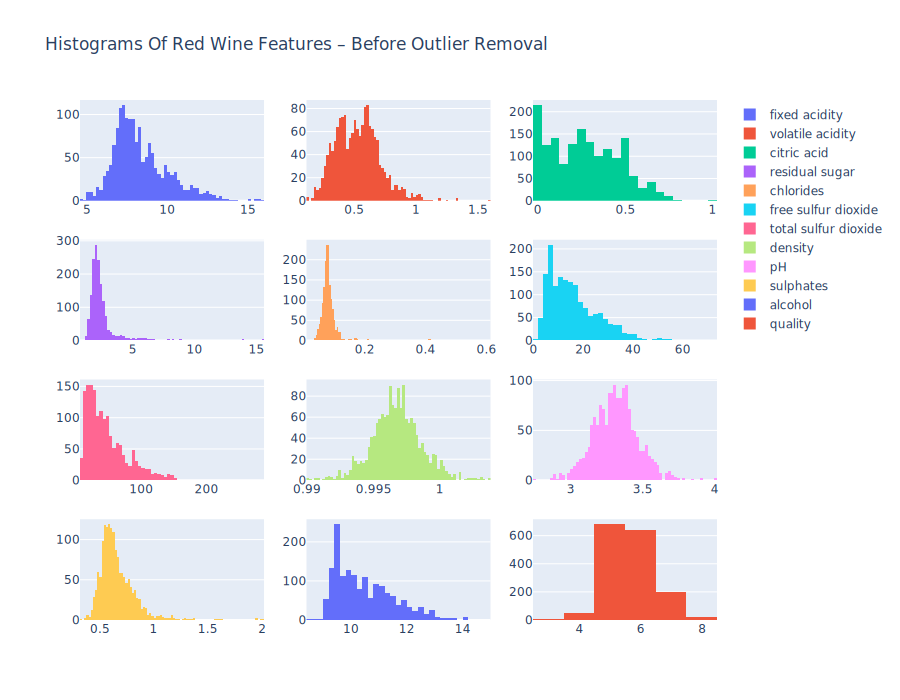

In [3]:
# Plot histograms for each variable.
fig = make_subplots(rows=4, cols=3)

for i, col in enumerate(red_wine.columns, 1):
    fig.add_trace(
        go.Histogram(
            x=red_wine[col],
            name=col
        ), 
        row=int(np.ceil(i / 3)), 
        col=i % 3 if i % 3 != 0 else 3
    )
    
fig.update_layout(
    title_text="Histograms Of Red Wine Features – Before Outlier Removal",
    height=800
)

fig.show()

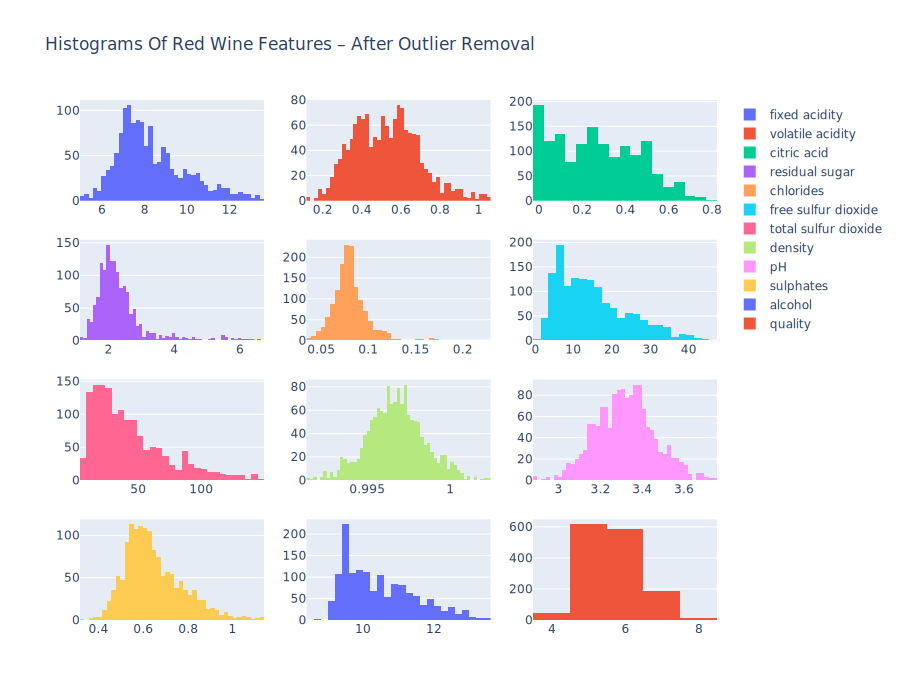

In [4]:
# Remove outliers from all features (outside the +-3 std range).
red_wine_clean = red_wine[(np.abs(stats.zscore(red_wine)) < 3).all(axis=1)]

# Plot histograms for each variable.
fig = make_subplots(rows=4, cols=3)

for i, col in enumerate(red_wine_clean.columns, 1):
    fig.add_trace(
        go.Histogram(
            x=red_wine_clean[col],
            name=col
        ), 
        row=int(np.ceil(i / 3)), 
        col=i % 3 if i % 3 != 0 else 3
    )
    
fig.update_layout(
    title_text="Histograms Of Red Wine Features – After Outlier Removal",
    height=800
)

fig.show()

## B. Principal Component Analysis

PCA is performed to visualize correlations between the different features in the `winequality-red` dataset. All features are scaled to zero mean and unit variance beforehand (otherwise PCA might determine that the direction of maximal variance corresponds to features varying more than others because of their scales).

Two plots are used to study correlations:

- a scree plot, showing eigenvalues ordered from largest to smallest. This plot can be used to determine the number of eigenvalues to keep for a later analysis;
- a variables factor map, showing the correlations between all twelve features and the top two principal components. Features that are grouped together are positively correlated, while features on opposite sides of the unit circle are negatively correlated.

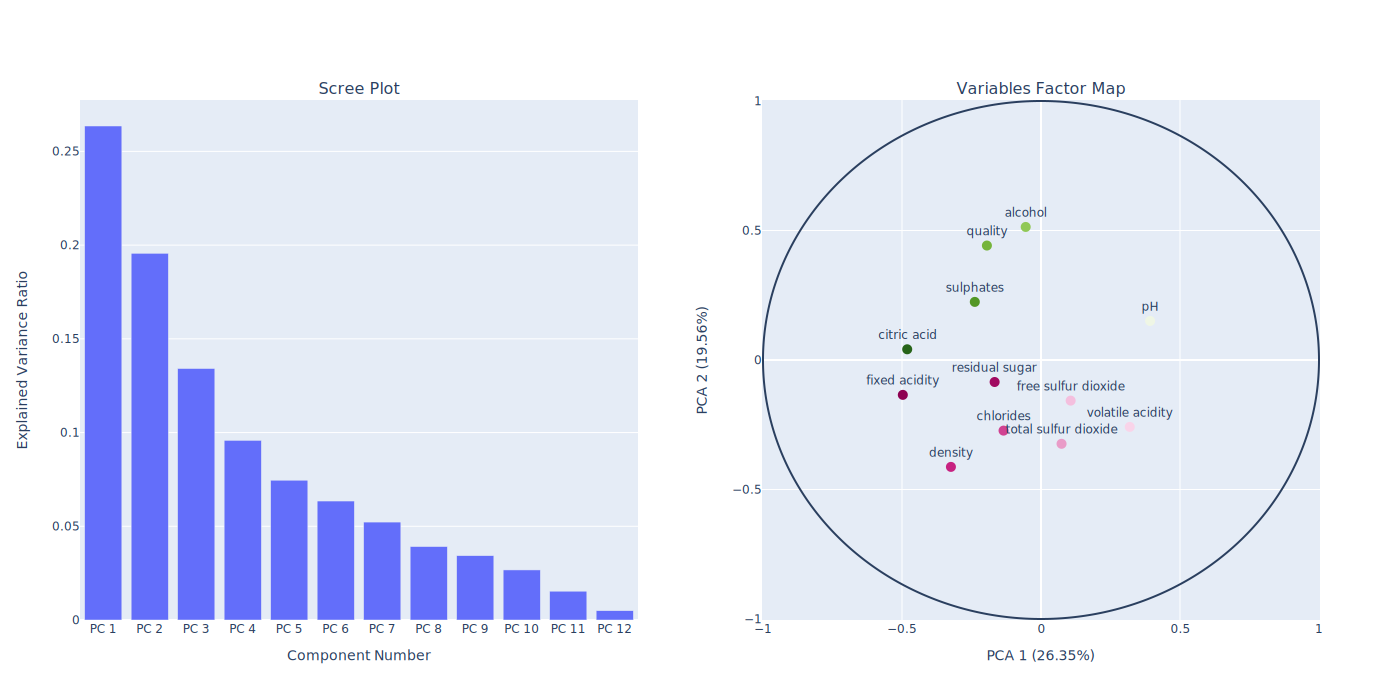

In [5]:
# Cleaned dataset is scaled to zero mean and unit variance.
red_wine_norm = pd.DataFrame(
    StandardScaler().fit_transform(red_wine_clean),
    columns=red_wine_clean.columns
)

# Fit PCA model.
pca_model = PCA()
pca_result = pca_model.fit_transform(red_wine_norm)

# Get correlations between components and features.
coef = pd.DataFrame(pca_model.components_.T[:, 0:2],
                    columns=["pc1", "pc2"],
                    index = red_wine.columns)

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Scree Plot", "Variables Factor Map"))

# Scree plot.
fig.add_trace(
    go.Bar(
        x=["PC {}".format(i) for i in range(1, pca_model.components_.shape[1]+1)],
        y=pca_model.explained_variance_ratio_,
        name="Scree Plot"
    ),
    row=1,
    col=1
)

# Variables factor map.
# The angle in the unit circle is used to compute the point color. This way
# correlated features will appear with similar colors.
fig.add_trace(
    go.Scatter(
        x=coef.pc1,
        y=coef.pc2,
        text=red_wine.columns,
        mode="markers+text",
        textposition="top center",
        marker=dict(
            size=10,
            color=np.angle(coef.pc1 + 1j*coef.pc2, deg=True)
        ),
        name="Variables Factor Map"
    ),
    row=1,
    col=2
)

# Add unit circle.
fig.update_layout(
    shapes=[
        # unfilled circle
        dict(
            type="circle",
            xref="x2",
            yref="y2",
            x0=-1,
            y0=-1,
            x1=1,
            y1=1
        ),
    ]
)
    
# Update figure size, axes titles and remove legend.
fig.update_layout(
    height=600, 
    width=1200, 
    showlegend=False,
    xaxis_title="Component Number",
    yaxis_title="Explained Variance Ratio",
    xaxis2_title="PCA 1 ({:.2f}%)".format(pca_model.explained_variance_ratio_[0]*100),
    yaxis2_title="PCA 2 ({:.2f}%)".format(pca_model.explained_variance_ratio_[1]*100)
)

fig.show(width=1400)


The scree plot shows that the top two principal components explain about 45% of the variance. Therefore, using only the top two components to analyse the data is risky, as a lot of information is lost in the higher dimensions. 

On the variables factor map, using the top two components, we observe:

- a strong positive correlation between the `alcohol` and `quality` features, with a slightly weaker correlation between these features and the `sulphates`.
- a strong negative correlation between the `alcohol`, `quality` and `sulphates` features and the `volatile acidity`, `total sulfur dioxide` and `free sulfur dioxide` features.

As previously stated, considering that the rest of the components still explain a significant part of the variance, the variables factor map should be interpreted with caution: in higher dimensions, some of these points could be farther apart than seen on a 2D visualization.

## C. Multivariate Linear Regression

We perform multivariate linear regression (ordinary least squares) of the `quality` score against the remaining 11 input features (with intercept). The estimated model parameters and the coefficient of determination are compared when the features are standardized either by simply removing the mean, or by both removing the mean and scaling to unit variance.

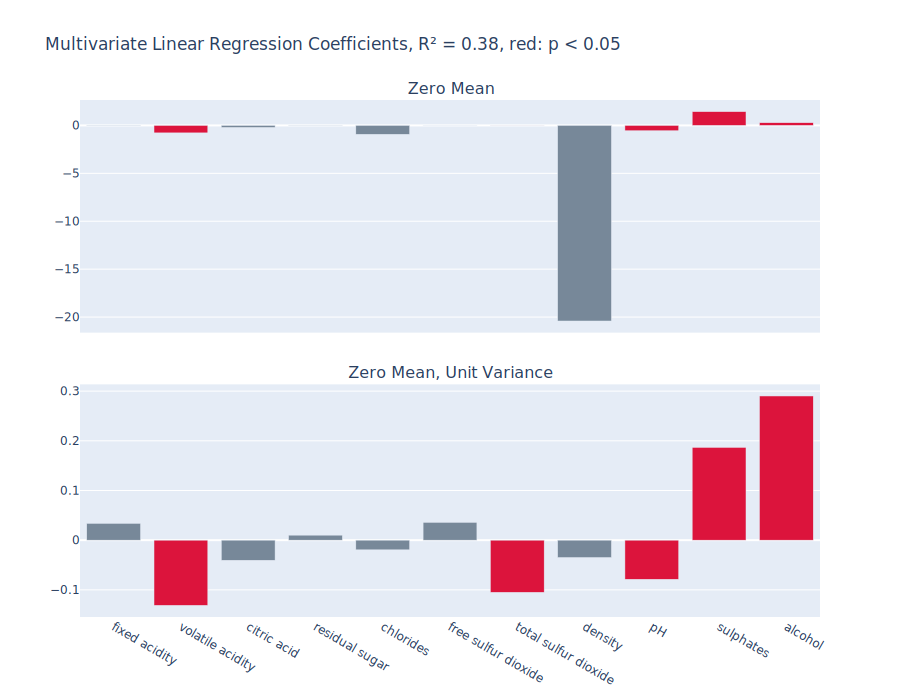

In [6]:
# Standardize input features (zero mean, with or without unit variance).
X_mean_removed = StandardScaler(with_std=False).fit_transform(red_wine_clean.drop("quality", axis=1))
X_norm = StandardScaler().fit_transform(red_wine_clean.drop("quality", axis=1))

y = red_wine_clean.quality

# Perform multivariate linear regression with both standardization conditions.
# A constant column is added to the input features for the intercept term.
est_zero_mean = sm.OLS(y, sm.add_constant(X_mean_removed)).fit()
est_norm = sm.OLS(y, sm.add_constant(X_norm)).fit()

# Plot regression coefficients as grouped bar plots.
# Significant coefficients are colored in red, non-significant in gray.
fig = make_subplots(
    rows=2, cols=1, 
    shared_xaxes=True, 
    vertical_spacing=0.1,
    subplot_titles=("Zero Mean", "Zero Mean, Unit Variance")
)

fig.add_trace(
    go.Bar(
        x=red_wine.columns,
        y=est_zero_mean.params[1:],
        name="Zero Mean",
        marker_color=["crimson" if p <= 0.05 else "lightslategray" for p in est_zero_mean.pvalues[1:]]
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Bar(
        x=red_wine.columns,
        y=est_norm.params[1:],
        name="Zero Mean, Unit Variance",
        marker_color=["crimson" if p <= 0.05 else "lightslategray" for p in est_norm.pvalues[1:]]
    ),
    row=2,
    col=1
)

fig.update_layout(
    title="Multivariate Linear Regression Coefficients, R² = {:.2f}, red: p < 0.05 ".format(est_norm.rsquared),
    showlegend=False,
    height=800
)

fig.show()

The intercept term isn't displayed as it would hinder the visualization (it correponds to the mean of the `quality` score). As expected, the standard scaling of the dataset prior to regression (zero mean and unit variance) is essential to interpret the results: when the individual features aren't comparable due to their difference in scales, their respective regression coefficients aren't comparable either.

The coefficient of determination doesn't change between both settings, as it is already normalized (normalized covariance). Its value is relatively low: the current model including all input features and an intercept term explains only about 37% of the variance of the `quality` feature. Looking back at the histogram of the `quality` feature, we can see that it has very low variance, with most scores being either 5 or 6. Seeing that the difference in `quality` between the wines is almost binary, the multivariate linear model isn't well suited. To obtain better predictions, further processing of the `quality` feature would be necessary (e.g. using a continuous scale), or a new model could be used (e.g. multivariate logistic regression, by binarizing the `quality` score).

Most regression coefficients aren't significant at the 5% level: the significant features are colored in red on the above box plots. From the remaining features, we observe that

- the `alcohol` and `sulphates` features show positive influence on the `quality` score;
- the `volatile acidity`, `total sulfur dioxide` and `pH` features show negative influence on the `quality` score.

## D. Lasso Regression And Model Selection

As the OLS model including all input features was inaccurate, lasso is suggested in this section as a way to select relevant features for the prediction of `quality`. However, lasso is likely to suffer the same fate as OLS, as it won't be able to explain more variance than the full OLS model.

The lasso model will be fitted along a given regularization path: $\alpha\in[10^{-3}, 1]$. To assess performance, the cleaned dataset will be split into a training set of size 500 and a testing test of size 941. A scaler for zero mean and unit variance will be fit on the training set and the transformation applied on both training and testing sets. Finally, to find the best model, 10-fold cross-validation will be used along the regularization path.

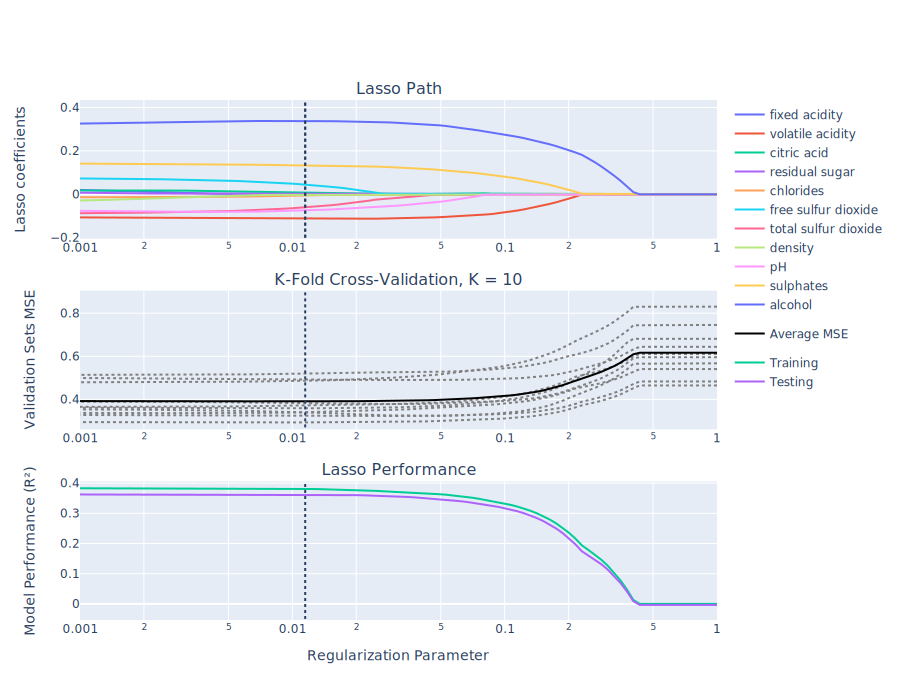

In [7]:
# Split dataset into testing and training set.
X_train, X_test, y_train, y_test = train_test_split(
    red_wine_clean.drop("quality", axis=1), 
    red_wine_clean.quality, 
    train_size=500, 
    random_state=42
)

# Standardize data, fitting only on training set.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

_, n = X_train.shape

# Regularization parameters path.
alphas = np.logspace(-3, 0, 100)

# Compute lasso path with coordinate descent.
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=alphas, random_state=42)

# Compute lasso with iterative fitting along the regularization path.
# The best model is chosen by 10-fold cross-validation.
model = LassoCV(cv=10, alphas=alphas, random_state=42).fit(X_train, y_train)

# Compute training and testing score (R^2) along the regularization path.
training_score = []
testing_score = []
for a in alphas:
    reg = Lasso(alpha=a, random_state=42).fit(X_train, y_train)
    training_score.append(reg.score(X_train, y_train))
    testing_score.append(reg.score(X_test, y_test))

# Plot lasso coefficients, MSE and performance along the regularization path.
fig = make_subplots(
    rows=3, 
    cols=1, 
    vertical_spacing=0.1,
    subplot_titles=("Lasso Path", "K-Fold Cross-Validation, K = 10", "Lasso Performance")
)

# Lasso coefficients.
for i in range(n):
    fig.add_trace(
        go.Scatter(
            x=alphas_lasso,
            y=coefs_lasso[i],
            name=red_wine_clean.columns[i],
            mode="lines",
            legendgroup="lasso"
        ),
        row=1,
        col=1
    )

# Lasso MSE.
for i in range(10):
    fig.add_trace(
        go.Scatter(
            x=model.alphas_,
            y=model.mse_path_[:, i],
            mode="lines",
            line=dict(dash="dot"),
            marker_color="grey",
            showlegend=False,
            name="MSE {}".format(i)
        ),
        row=2,
        col=1
    )
fig.add_trace(
    go.Scatter(
        x=model.alphas_,
        y=model.mse_path_.mean(axis=1),
        mode="lines",
        marker_color="black",
        legendgroup="cv",
        name="Average MSE"
    ),
    row=2,
    col=1
)

# Lasso performance.
fig.add_trace(
    go.Scatter(
        x=alphas,
        y=training_score,
        mode="lines",
        legendgroup="performance",
        name="Training"
    ),
    row=3,
    col=1
)
fig.add_trace(
    go.Scatter(
        x=alphas,
        y=testing_score,
        mode="lines",
        legendgroup="performance",
        name="Testing"
    ),
    row=3,
    col=1
)

# Add dashed line on each plot to indicate the regularization factor for the best model.
min_alpha = model.alphas_[np.argmin(model.mse_path_.mean(axis=1))]
fig.add_shape(
    go.layout.Shape(
        type="line",
        yref="y",
        xref="x",
        x0=min_alpha,
        y0=-0.2,
        x1=min_alpha,
        y1=0.43,
        line=dict(dash="dot")
    ),
    row=1,
    col=1
)
fig.add_shape(
    go.layout.Shape(
        type="line",
        yref="y",
        xref="x",
        x0=min_alpha,
        y0=-0.2,
        x1=min_alpha,
        y1=0.43,
        line=dict(dash="dot")
    ),
    row=1,
    col=1
)
fig.add_shape(
    go.layout.Shape(
        type="line",
        yref="y",
        xref="x",
        x0=min_alpha,
        y0=0.27,
        x1=min_alpha,
        y1=0.9,
        line=dict(dash="dot")
    ),
    row=2,
    col=1
)
fig.add_shape(
    go.layout.Shape(
        type="line",
        yref="y",
        xref="x",
        x0=min_alpha,
        y0=-0.05,
        x1=min_alpha,
        y1=0.4,
        line=dict(dash="dot")
    ),
    row=3,
    col=1
)

fig.update_layout(
    xaxis_type="log", 
    xaxis2_type="log",
    xaxis3_type="log",
    xaxis3_title="Regularization Parameter",
    yaxis_title="Lasso coefficients",
    yaxis2_title="Validation Sets MSE",
    yaxis3_title="Model Performance (R²)",
    height=800
)
    
fig.show()

The dashed line across all plots represents the best model obtained through 10-fold cross-validation. For this optimal model, the lasso regression mainly includes:

- the `alcohol` and `sulphates` features, contributing positively to the `quality`;
- the `volatile acidity` feature contributing negatively to the `quality`.

This result is very close to the significant features found in the OLS model. Unexpectedly, the performance of the optimal lasso model is similar to the performance of the previous OLS model. Moreover, the benefit of cross-validation on this task seems negligible, considering the flatness of the average MSE. We can once again conclude that a linear model isn't well suited to this task.

## D'. Next Steps

Since the previous linear models were not able to accurately predict the `quality` of red wines, we are interested in knowing if a new model that takes into account the previous observations could do better. Since the `quality` is almost binary, as seen on the first histogram, we fix an arbitrary threshold that will discriminate between *good* and *bad* wines. This threshold is fixed at a `quality` of 5.5, so that wines with a score of 5 or lower will be rated as *bad*.

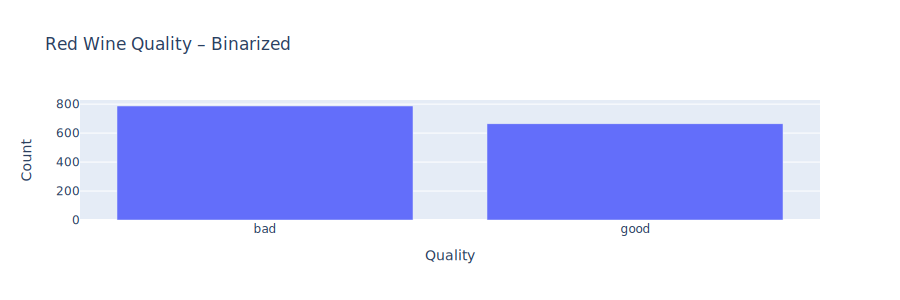

In [8]:
# Deep copy used so that the original dataset isn't modified.
red_wine_bin = red_wine_clean.copy(deep=True)

# Binarize the quality feature into "good" and "bad" wines.
bins = (2, 5.5, 8)
group_names = ["bad", "good"]
red_wine_bin["quality"] = pd.cut(red_wine_bin.quality, bins=bins, labels=group_names)

# Bar plot of wine quality.
fig = go.Figure(go.Bar(
    x=["bad", "good"],
    y=red_wine_bin.quality.value_counts()
))

fig.update_layout(
    title="Red Wine Quality – Binarized",
    xaxis_title="Quality",
    yaxis_title="Count",
    height=800
)

fig.show(height=300)

Now that the `quality` has been binarized, the dataset is split into training and testing sets, with a more common 80%/20% ratio. The input features are standardized to get optimal results. A linear SVM model is used for classification, because of its ease of use.

In [9]:
# Split dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    red_wine_bin.drop("quality", axis=1), 
    red_wine_bin.quality, 
    test_size=0.2, 
    random_state=42
)

# Standardize input features.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = LinearSVC(max_iter=2000)
clf.fit(X_train, y_train)

print("Classification report on the testing test:\n")
print(classification_report(y_test, clf.predict(X_test)))

Classification report on the testing test:

              precision    recall  f1-score   support

         bad       0.69      0.69      0.69       131
        good       0.74      0.74      0.74       160

    accuracy                           0.72       291
   macro avg       0.72      0.72      0.72       291
weighted avg       0.72      0.72      0.72       291



We obtain a mean precision and recall on the testing set of about 72%. This performance could be slightly improved by using cross-validation and a non-linear SVM (kernel trick), but other methods (random forest, k-NN, etc.) should probably show better performances.

## E. Classification

In this section, we will try to classify wine color from their physicochemical properties, using datasets `winequality-red` and `winequality-white`. The white wine dataset is cleaned out of outliers using the same criterion as before (outliers outside the ±3 standard deviations range are removed) and merged with the clean red wine dataset. A `color` feature is added to the dataset to distinguish red from white wines. The `quality` feature is removed as it won't be used by the classifier.

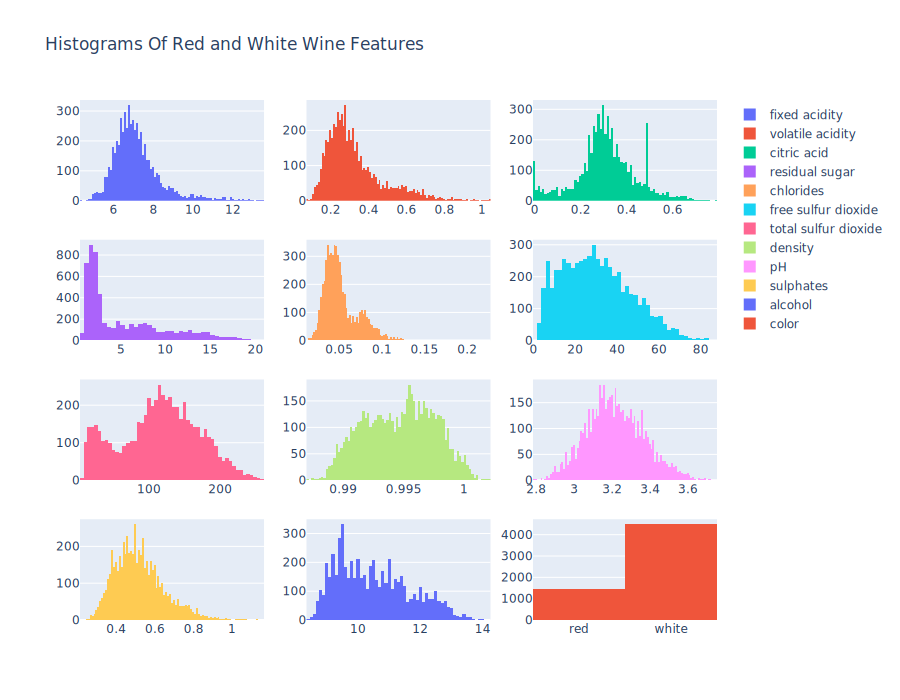

In [10]:
# Read white wine dataset and apply the same cleaning procedure as before.
white_wine = pd.read_csv("/Users/samuel/Documents/Work/ESPCI/3A/ML/homework/winequality/winequality-white.csv", sep=";")
white_wine_clean = white_wine[(np.abs(stats.zscore(white_wine)) < 3).all(axis=1)]

# Add color feature and merge datasets.
wine = pd.concat([red_wine_clean.assign(color="red"), white_wine_clean.assign(color="white")]).drop("quality", axis=1)

# Plot histograms for each variable.
fig = make_subplots(rows=4, cols=3)

for i, col in enumerate(wine.columns, 1):
    fig.add_trace(
        go.Histogram(
            x=wine[col],
            name=col
        ), 
        row=int(np.ceil(i / 3)), 
        col=i % 3 if i % 3 != 0 else 3
    )
    
fig.update_layout(
    title_text="Histograms Of Red and White Wine Features",
    height=800
)

fig.show()

With both datasets merged, we observe that some histograms are bimodal, which could indicate that these features will enable discrimination of red and white wines. We can then display a scatter plot using two of these features to see if wine color can be distinguished.

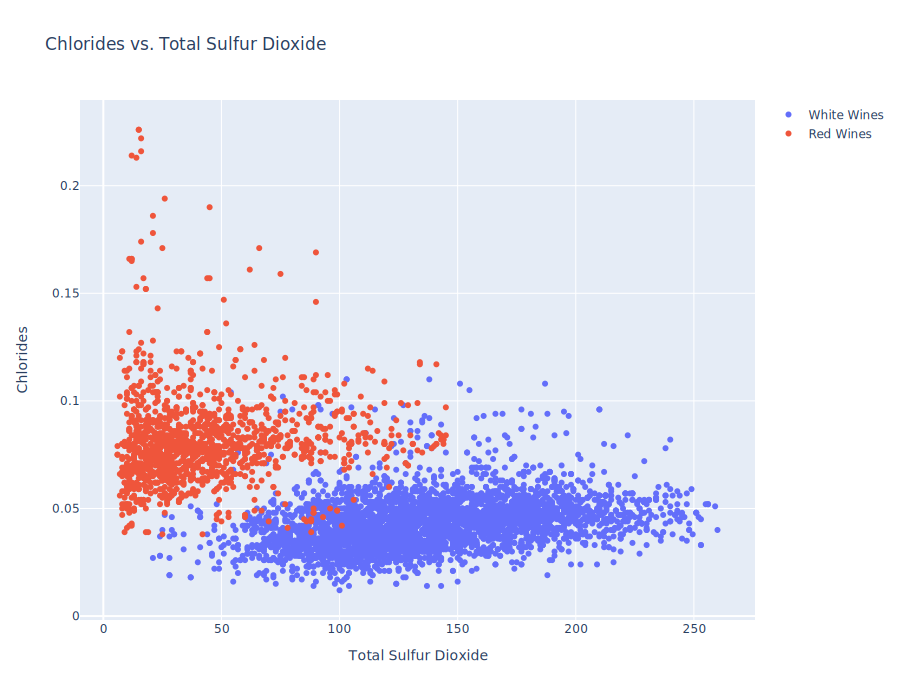

In [11]:
# Scatter plot chlorides vs. total sulfur dioxide.
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=wine.loc[wine.color == "white", "total sulfur dioxide"],
    y=wine.loc[wine.color == "white", "chlorides"],
    mode="markers",
    name="White Wines"
))
fig.add_trace(go.Scatter(
    x=wine.loc[wine.color == "red", "total sulfur dioxide"],
    y=wine.loc[wine.color == "red", "chlorides"],
    mode="markers",
    name="Red Wines"
))

fig.update_layout(
    title="Chlorides vs. Total Sulfur Dioxide",
    xaxis_title="Total Sulfur Dioxide",
    yaxis_title="Chlorides",
    height=800
)

fig.show()

Indeed, using only two features, wines can be almost perfectly visually classified according to their color. Given its ease of use compared to a PCA + k-mean clustering classifier, a linear SVM model is used once again. Considering the observations on the histograms, the dataset is split into training and testing sets using a 10%/90% ratio.

In [12]:
# Split dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    wine.drop("color", axis=1), 
    wine.color, 
    test_size=0.90, 
    random_state=42
)

# Standardize input features.
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Fit linear SVM and print accuracy.
clf = LinearSVC(max_iter=2000)
clf.fit(X_train, y_train)

print("Mean accuracy on training set: {:.2f}%".format(100*clf.score(X_train, y_train)))
print("Mean accuracy on testing set: {:.2f}%".format(100*clf.score(X_test, y_test)))

Mean accuracy on training set: 100.00%
Mean accuracy on testing set: 99.76%


Indeed, the linear SVM classifier is perfectly suited for this task: the error on the testing set is only about 0.2%. Finally, we can study which variables should be kept to keep this error below 1%. The `chlorides`, `total sulfur dioxide`, `density` and `residual sugar` features are selected based on their histograms.

In [13]:
# Split dataset into training and testing sets.
wine_test = wine[["chlorides", "total sulfur dioxide", "density", "residual sugar", "color"]]

X_train, X_test, y_train, y_test = train_test_split(
    wine_test.drop("color", axis=1), 
    wine_test.color, 
    test_size=0.90, 
    random_state=42
)

# Standardize input features.
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Fit linear SVM and print accuracy.
clf = LinearSVC(max_iter=2000)
clf.fit(X_train, y_train)

print("Mean accuracy on training set: {:.2f}%".format(100*clf.score(X_train, y_train)))
print("Mean accuracy on testing set: {:.2f}%".format(100*clf.score(X_test, y_test)))

Mean accuracy on training set: 99.33%
Mean accuracy on testing set: 99.33%


As we can see, keeping only these features, the test error is only about 0.7%: we were able to reduce the dataset to only four input features. Therefore, measuring only these four physicochemical properties should be sufficient to achieve a good color classification.

# III. Clustering Of Handwritten Digits

In this section, we consider the Handwritten Digits Data Set (E. Alpaydin *et al.*, 1998), available from https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/, and in particular the `optdigits.tes` testing dataset.

The dataset was obtained by processing 32x32 normalized bitmaps of handwritten digits. These bitmaps were divided into nonoverlapping 4x4 blocks and the number of *on* pixels were counted in each block. This operation reduced each bitmap to an 8x8 input matrix where each element is an integer in the range [0, 16]. Each row of the `optidigits.tes` dataset contains an 8x8 matrix reshaped to a horizontal 1x64 vector, with an additional class attribute column specifying the digit.

The goal of this section is to cluster the data without taking into account the labels, thus studying an unsupervised learning method. The class attribute column containing the label will be used to assess the results.

The data is read and the 64 input features are standardized to zero mean and unit variance. As we can see below, even with the dimension reduction applied by the authors, most digits are still identifiable.

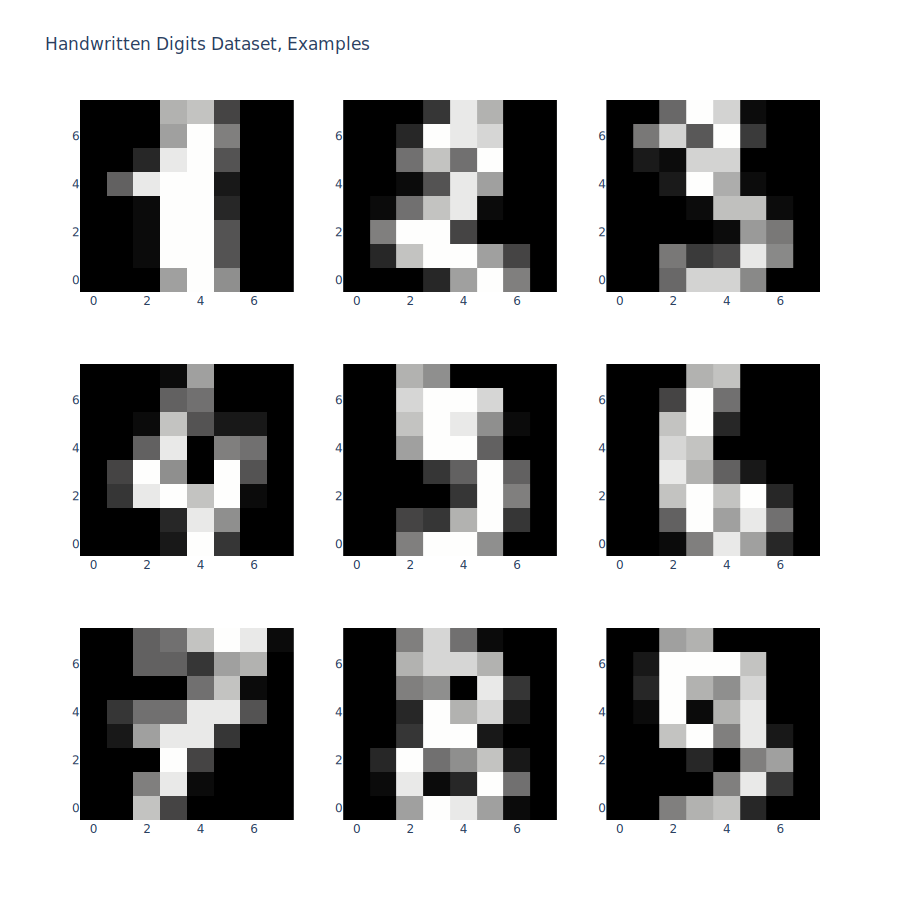

In [14]:
# Read dataset and separate input features and labels.
dig = np.loadtxt("/Users/samuel/Documents/Work/ESPCI/3A/ML/homework/optdigits.tes", dtype='i', delimiter=',')
X = dig[:, :-1]
y = dig[:, -1]

n, m = X.shape

# Plot some examples from the dataset.
fig = make_subplots(rows=3, cols=3)

for i in range(1,10):
    fig.add_trace(
        go.Heatmap(
            z=np.flip(X[i, :].reshape((8, 8)), 0),
            showscale=False,
            colorscale="gray",
            name="Label: {}".format(y[i])
        ),
        row=int(np.ceil(i / 3)), 
        col=i % 3 if i % 3 != 0 else 3
    )
    
fig.update_layout(
    title="Handwritten Digits Dataset, Examples",
    height=800, 
    width=800
)
    
fig.show(height=900)

# Standardize input features.
X_norm = StandardScaler().fit_transform(X)

## A. K-means Clustering

In this section, a K-means clustering method will be applied to cluster the data. First, we would like to find a good 2D visualization of the dataset. The projection of the data on the top two principal components is displayed below.

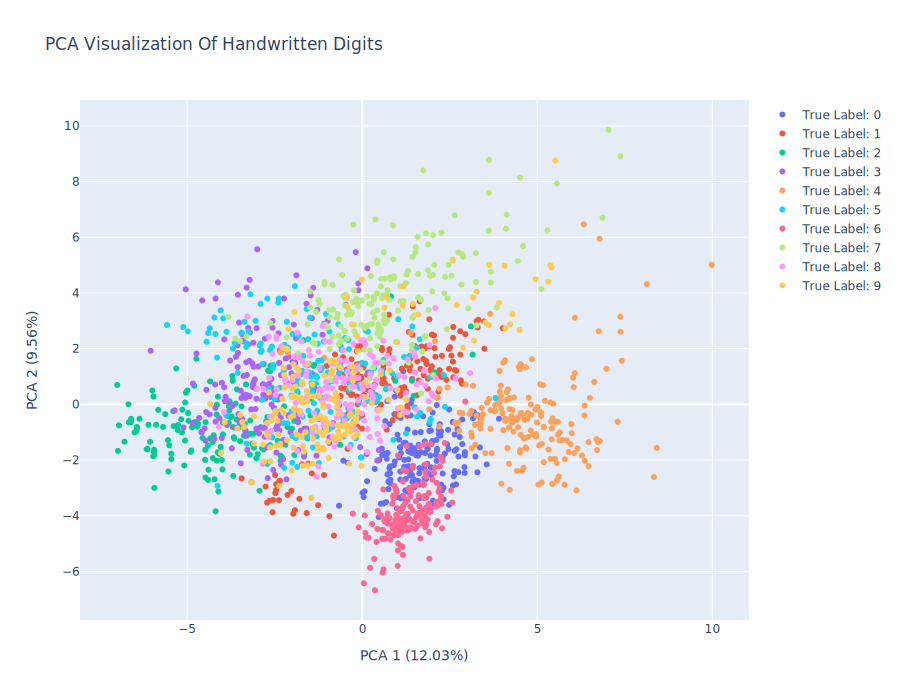

In [15]:
# Perform PCA and plot the projected input features on top 2 components.
pca_model = PCA()
pca_result = pca_model.fit_transform(X_norm)

fig = go.Figure()

for i in range(10):
    fig.add_trace(go.Scatter(
        x=pca_result[y==i, 0],
        y=pca_result[y==i, 1],
        mode="markers",
        marker_color=i,
        name="True Label: {}".format(i)
    ))
    
fig.update_layout(
    title="PCA Visualization Of Handwritten Digits",
    xaxis_title="PCA 1 ({:.2f}%)".format(pca_model.explained_variance_ratio_[0]*100),
    yaxis_title="PCA 2 ({:.2f}%)".format(pca_model.explained_variance_ratio_[1]*100),
    height=800
)

fig.show()

Unfortunately, individual clusters are hardly identifiable on this visualization and the top two components explain a very low variance ratio. The Handwritten Digits dataset being a non-trivial high-dimensional structure, this type of linear projections won't be able to perform well. Luckily, t-SNE, a popular visualization algorithm that is often very succesful at revealing clusters in data, can be used in this situation. t-SNE roughly works by trying to optimize for preserving the topology of the data.

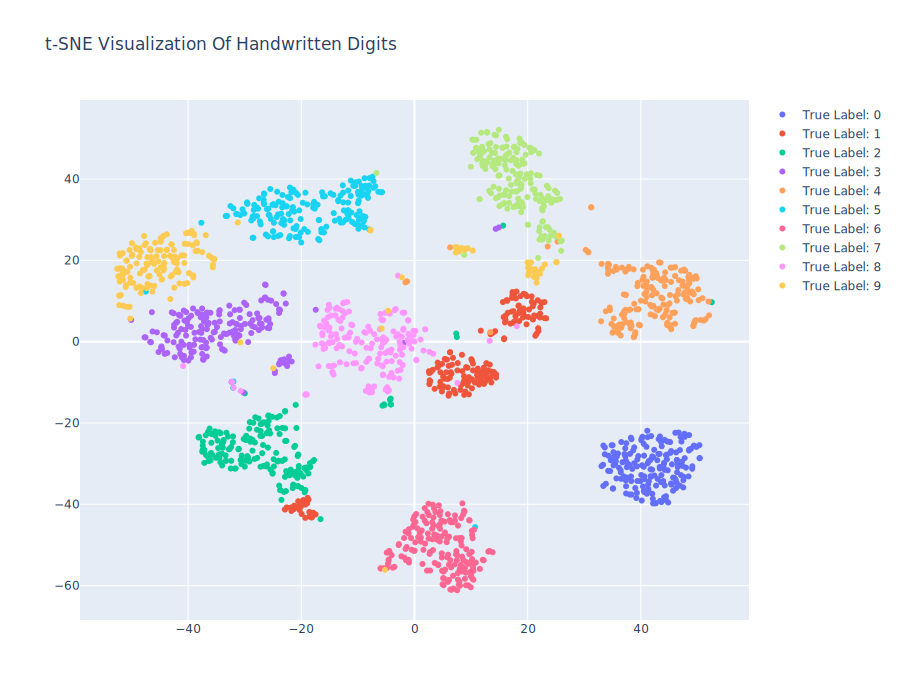

In [16]:
# Fit t-SNE with PCA initialization.
tsne = TSNE(n_components=2, init="pca", random_state=42)
X_tsne = tsne.fit_transform(X_norm)

fig = go.Figure()

for i in range(10):
    fig.add_trace(go.Scatter(
        x=X_tsne[y==i, 0],
        y=X_tsne[y==i, 1],
        mode="markers",
        marker_color=i,
        name="True Label: {}".format(i)
    ))

fig.update_layout(
    title="t-SNE Visualization Of Handwritten Digits",
    height=800
)
    
fig.show()

As we can see, t-SNE does an impressive job at finding clusters compared to PCA. However, it is still prone to getting stuck in local minima, as is the case for some images of ones. 

We can now perform K-means clustering and visualize its performance using t-SNE compared to the above plot. The clustering will be performed using K=10 clusters (for the 10 available digits) and the results of 10 different initial conditions will be compared. These initial conditions should not be chosen based on the t-SNE results, since neither distances nor density are preserved well (cf. *Intrinsic t-Stochastic Neighbor Embedding for Visualization and Outlier Detection – A Remedy Against the Curse of Dimensionality?*). Therefore, initial cluster centroids will be selected at random from the observations.

To evaluate the clustering performance, two criterion will be compared:

- the intertia, corresponding to the sum of distances of samples to their closest cluster center;
- an arbitrary score, corresponding to the fraction of pairs of samples that are correctly partitioned.

In [17]:
# Store scores as defined by the exercise, and k-means inertias.
scores = []
inertias = []
for cond in range(10):
    # Perform k-means, using a fixed random state for reproducibility.
    kmeans = KMeans(n_clusters=10, init="random", n_init=1, random_state=cond).fit(X_norm)
    labels = kmeans.labels_
    
    # Compute clustering score.
    digit_pairs = np.zeros((n, n))
    for i in range(0, n):
        for j in range(i+1, n):
            digit_pairs[i,j] = (labels[i]==labels[j] and y[i]== y[j]) or (labels[i]!=labels[j] and y[i]!=y[j])
    scores.append(100*np.sum(digit_pairs)*2/(n*(n-1))) 
    inertias.append(kmeans.inertia_)

Minimum score: 88.47%
Maximum score: 92.51%


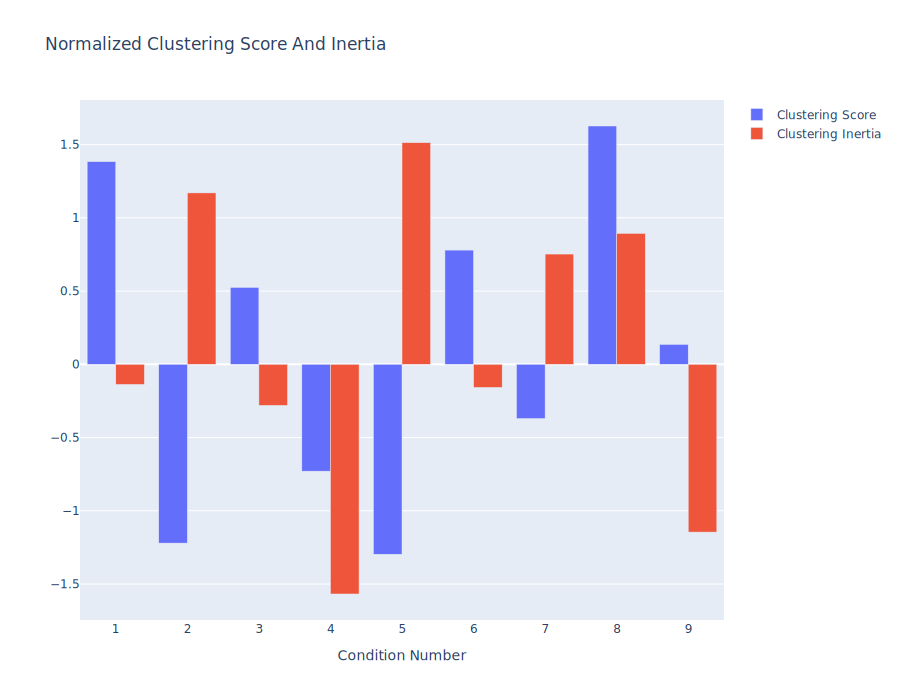

In [18]:
print("Minimum score: {:.2f}%".format(np.min(scores)))
print("Maximum score: {:.2f}%".format(np.max(scores)))

# Plot normalized criteria.
fig = go.Figure()

fig.add_trace(go.Bar(
    x=list(range(1, 10)),
    y=(scores - np.mean(scores)) / np.std(scores),
    name="Clustering Score"
))

fig.add_trace(go.Bar(
    x=list(range(1, 10)),
    y=(inertias - np.mean(inertias)) / np.std(inertias),
    name="Clustering Inertia"
))

fig.update_layout(
    title="Normalized Clustering Score And Inertia",
    xaxis_title="Condition Number",
    height=800
)

fig.show()

As we can see from the bar plot above, the clustering score and inertia seem to be uncorrelated. The maximum score reached is about 93% and doesn't seem to vary much between conditions. Below is displayed the result of a K-means clustering with K=10 and using the k-means++ algorithm with 10 repetitions for finding initial centroids (D. Arthur *et al.*, 2007).

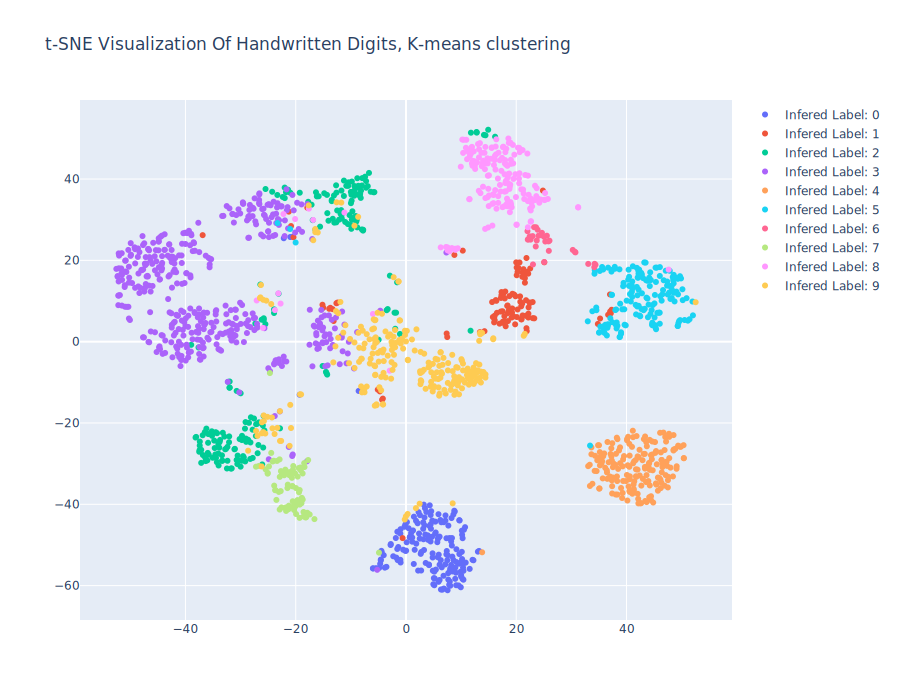

In [19]:
# Perform k-means using 10 clusters, k-means++ and 10 repetitions.
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_norm)

# Plot t-SNE visualization with infered labels.
fig = go.Figure()

for i in range(10):
    fig.add_trace(go.Scatter(
        x=X_tsne[kmeans.labels_==i, 0],
        y=X_tsne[kmeans.labels_==i, 1],
        mode="markers",
        marker_color=i,
        name="Infered Label: {}".format(i)
    ))

fig.update_layout(
    title="t-SNE Visualization Of Handwritten Digits, K-means clustering",
    height=800
)
    
fig.show()

By comparing with the first t-SNE visualization, the K-means clustering was able to correctly identify some of the clusters, but still fails on most of them. For example, the ones are mostly absorbed in the original cluster of eights, while the cluster of threes, fives and nines are merged into one cluster.

Considering that the correct number of clusters was known beforehand, we are now interested in knowing if this parameter can be infered from the data. The performance and inertia of K-means clusterings with K varying from 5 to 20 is compared.

In [20]:
# Store custom score and k-means inertias.
scores = []
inertias = []
for n_clusters in range(5, 21):
    # Perform k-means, using a fixed random state for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=n_clusters).fit(X_norm)
    labels = kmeans.labels_
    
    # Compute clustering score.
    digit_pairs = np.zeros((n, n))
    for i in range(0, n):
        for j in range(i+1,n):
            digit_pairs[i,j] = (labels[i]==labels[j] and y[i]== y[j]) or (labels[i]!=labels[j] and y[i]!=y[j])
    scores.append(100*np.sum(digit_pairs)*2/(n*(n-1))) 
    inertias.append(kmeans.inertia_)

Minimum score: 81.84%
Maximum score: 94.50%


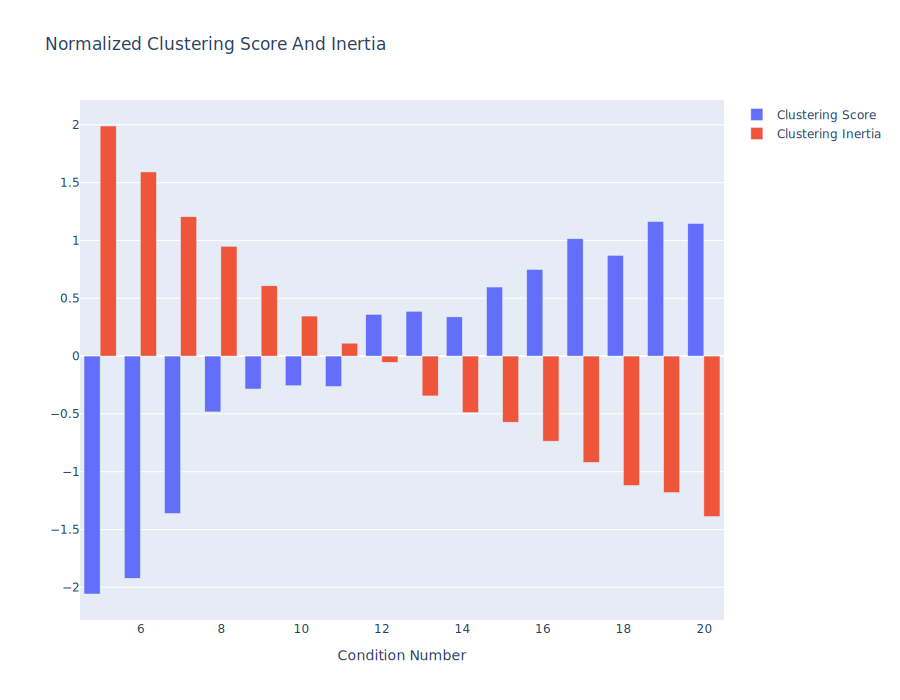

In [21]:
print("Minimum score: {:.2f}%".format(np.min(scores)))
print("Maximum score: {:.2f}%".format(np.max(scores)))

# Plot normalized criteria.
fig = go.Figure()

fig.add_trace(go.Bar(
    x=list(range(5, 21)),
    y=(scores - np.mean(scores)) / np.std(scores),
    name="Clustering Score"
))

fig.add_trace(go.Bar(
    x=list(range(5, 21)),
    y=(inertias - np.mean(inertias)) / np.std(inertias),
    name="Clustering Inertia"
))

fig.update_layout(
    title="Normalized Clustering Score And Inertia",
    xaxis_title="Condition Number",
    height=800
)

fig.show()

As expected from the structure complexity of this dataset, simply looking at these criteria doesn't give any clue on the correct number of clusters that one should use. When K varies from 5 to 20, the inertia decreases: this is expected, since adding more centroids will decrease the sum of distances of samples to their closest cluster center. On the other hand, the clustering score increases way past the K = 10 mark, without giving any clue on the correct number of clusters.

Finally, we observed that K-means clustering alone wasn't able to accurately find meaningful clusters or subclusters in the data. To improve its performance, it should be applied after a dimensionality reduction step such as PCA or MDS.

## B. Hierarchical Clustering

In this section, we will study a new clustering method: agglomerative hierarchical clustering. In particular, we are interested in the effect of different linkage methods on the resulting clusters:

- **ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach;
- **maximum or complete linkage** minimizes the maximum distance between observations of pairs of clusters;
- **average linkage** minimizes the average of the distances between all observations of pairs of clusters;
- **single linkage** minimizes the distance between the closest observations of pairs of clusters.

25 samples of each of the first three digits will be taken at random and the clustering results will be visualized using dendrograms.

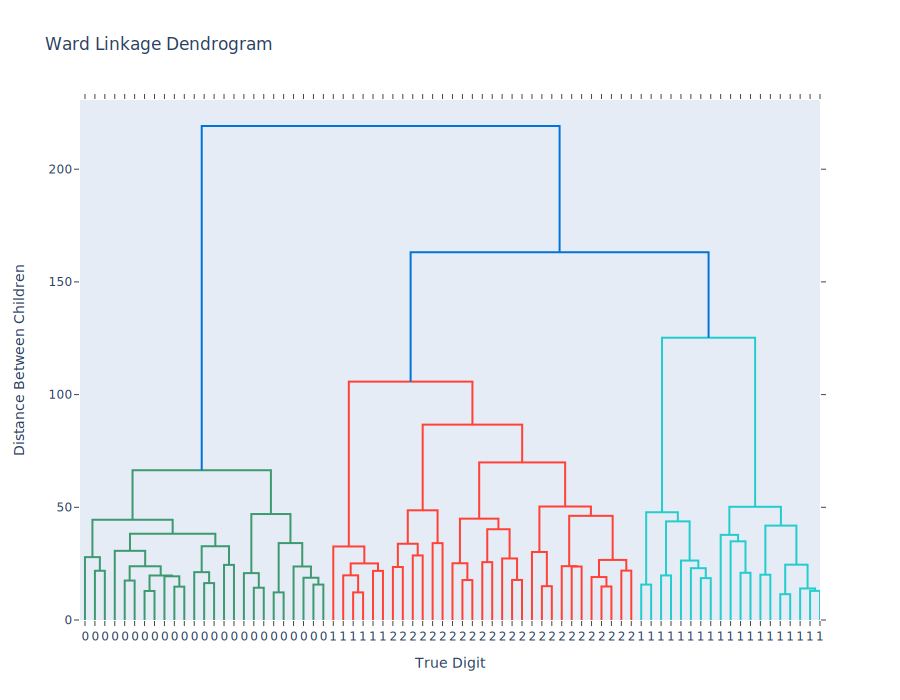

In [22]:
# Select 25 samples of each of the first three digits.
n_samples = 25
n_digits = 3
samples = np.zeros((n_digits, n_samples, m))
for i in range(n_digits):
    idx = np.random.choice(np.where(y == i)[0], size=n_samples, replace=False)
    samples[i] = X[idx]

# Reshape samples into a single array.
data_array = np.reshape(samples, (n_digits*n_samples, m))
labels = [0]*25 + [1]*25 + [2]*25

# Plot dendrogram for ward linkage.
fig1 = ff.create_dendrogram(
    data_array,
    labels=labels,
    linkagefun=lambda x: linkage(data_array, method="ward", metric="euclidean"),
    orientation="bottom",
    color_threshold=130
)

fig1.update_layout(title="Ward Linkage Dendrogram",
    xaxis_title="True Digit",
    yaxis_title="Distance Between Children"
)

fig1.show()

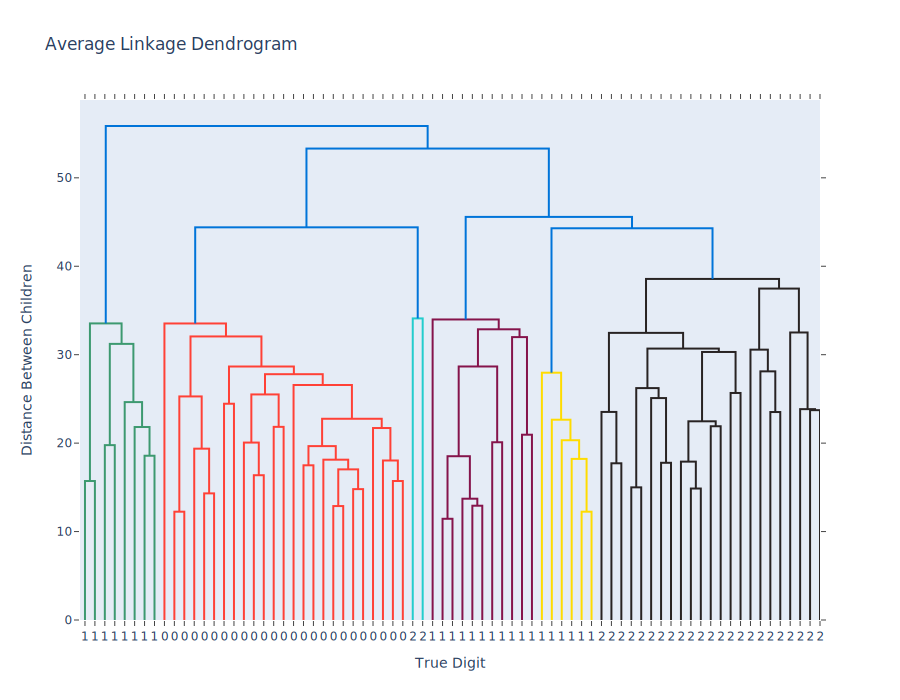

In [23]:
# Plot dendrogram for average linkage.
fig3 = ff.create_dendrogram(
    data_array,
    labels=labels,
    linkagefun=lambda x: linkage(data_array, method="average", metric="euclidean"),
    orientation="bottom",
    color_threshold=40
)

fig3.update_layout(title="Average Linkage Dendrogram",
    xaxis_title="True Digit",
    yaxis_title="Distance Between Children"
)

fig3.show()

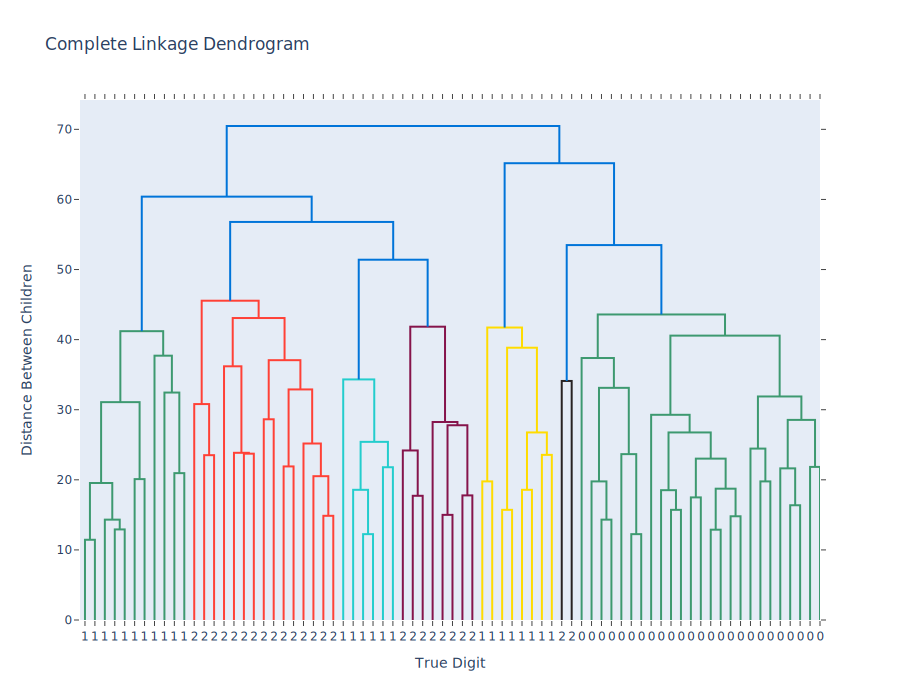

In [24]:
# Plot dendrogram for complete linkage.
fig4 = ff.create_dendrogram(
    data_array,
    labels=labels,
    linkagefun=lambda x: linkage(data_array, method="complete", metric="euclidean"),
    orientation="bottom",
    color_threshold=48
)

fig4.update_layout(title="Complete Linkage Dendrogram",
    xaxis_title="True Digit",
    yaxis_title="Distance Between Children"
)

fig4.show()

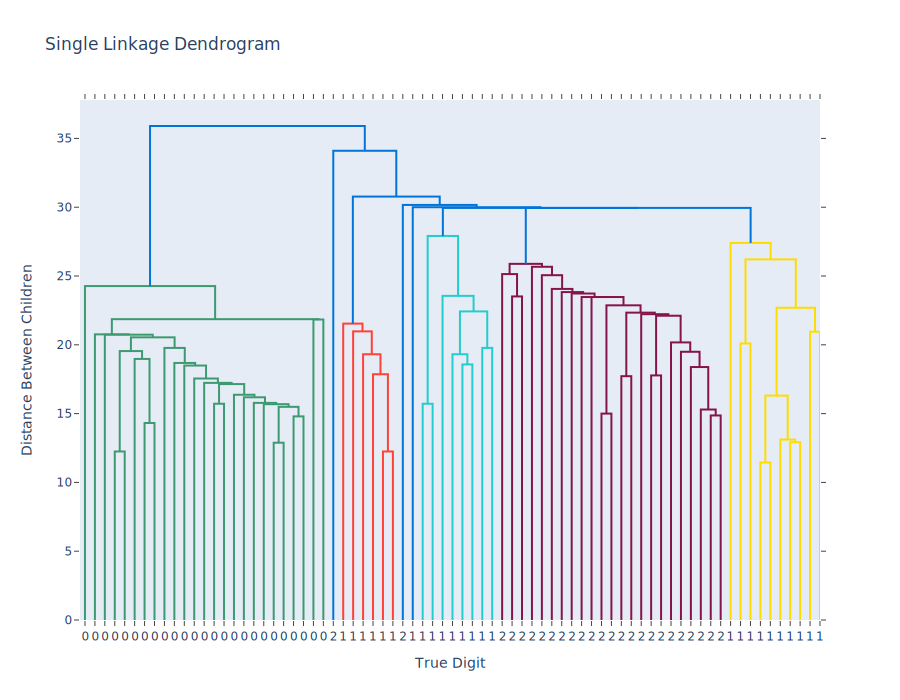

In [25]:
# Plot dendrogram for single linkage.
fig2 = ff.create_dendrogram(
    data_array,
    labels=labels,
    linkagefun=lambda x: linkage(data_array, method="single", metric="euclidean"),
    orientation="bottom",
    color_threshold=29
)

fig2.update_layout(
    title="Single Linkage Dendrogram",
    xaxis_title="True Digit",
    yaxis_title="Distance Between Children"
)

fig2.show()

The color thresholds were fixed to identify meaningful clusters. We observe on the dendrograms that for all linkage methods, the zeros are almost perfectly clustered, in particular using single and ward linkage. However, the ones and twos show more overlap: only the ward linkage shows almost perfect clustering, while the average linkage displays minimal overlap. Single and complete linkage aren't able to cluster these digits in a meaningful way. This overlap between ones and twos is consistent with the mis-grouping observed on the t-SNE visualization: this could indicate that there is some interpenetration of these digits in the raw dataset.